In [4]:
ensemble_weights = {
    '01431/submission.csv': 2,
    'day2_LR0001_SUB01587/submission.csv': 1,
    'CONVTR_SUB01533/submission.csv': 1.5
}

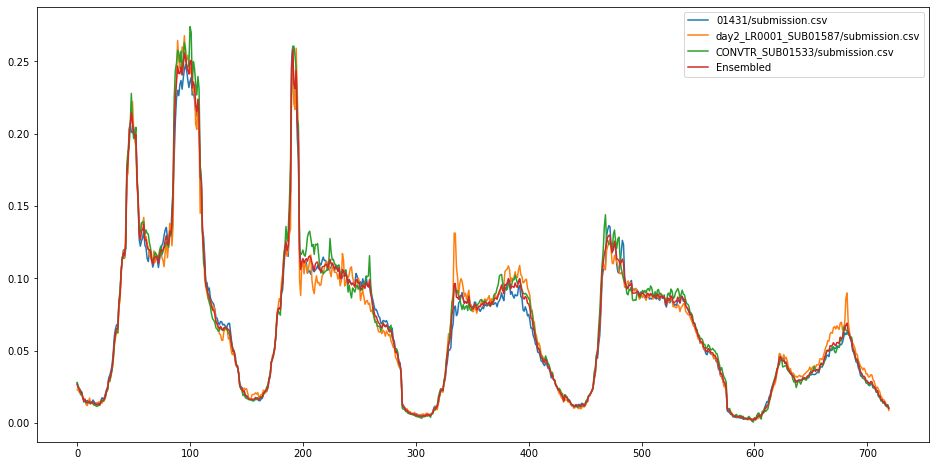

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ensembled = None

# 테스트 총 Row 수: 247680
# 144개가 한 단위이므로,
# 총 1720개 객체가 있다
num_plots = 5
choices = np.random.choice(list(range(1720)), num_plots, replace=False)
to_show = np.full(247680, False)
for choice in choices:
    to_show[choice*144: (choice + 1) * 144] = True

plt.figure(figsize=(16, 8))
weight_sum = 0.
for file_path in ensemble_weights:
    weight = ensemble_weights[file_path]
    weight_sum += weight
    df = pd.read_csv(file_path)
    if ensembled is None:
        ensembled = df.copy()
        ensembled['value'] = 0.0
    ensembled['value'] += df['value'] * weight
    plt.plot(df['value'].values[to_show], label=file_path)

ensembled['value'] = ensembled['value'] / weight_sum
plt.plot(ensembled['value'].values[to_show], label='Ensembled')
plt.legend()

In [7]:
import os

DIR = NAME = 'Ensemble'
dir_iter = 1
if os.path.exists(DIR):
    while os.path.exists(DIR):
        DIR = NAME + '_' + str(dir_iter)
        dir_iter += 1
os.mkdir(DIR)
print("Generated a directory:", DIR)

Generated a directory: Ensemble_1


In [8]:
import json

with open(os.path.join(DIR, "ensemble_config.json"), "w") as json_file:
    print("Saving a ensemble config file")
    json.dump(ensemble_weights, json_file)

Saving a ensemble config file


In [9]:
ensembled.to_csv(os.path.join(DIR, 'ensembled_submission.csv'), index=False)